# **Long Short Term Memory(LSTM) based - Stock prediction**
**Aim** :: To predict the Closing stock price using past 60 day stock price.

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that is specifically designed to handle sequential data, such as time series, speech, and text. LSTM networks are capable of learning long-term dependencies in sequential data, which makes them well suited for tasks such as language translation, speech recognition, and time series forecasting

In [ ]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


**Data Preparation ::** Works on Apple Based Data

Change start and end date for collection, as per Company. (Start date can't be before the company was founded.)

In [ ]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = "AAPL"

#Starting and Ending Date of our Stock DataSet
start_date = "2012-01-01"
end_date = "2019-12-17"

# Fetch the historical data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Show the data
print(df)


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.449692  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.516597  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.655555  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.787852  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.767570  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  65.390457   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  65.948196   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.116257  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.014984  133587600
2019-12

In [ ]:
#Get the number of rows and colums in the data set
print(f"The Number of Rows and Column in DataSet will be : {df.shape}")

The Number of Rows and Column in DataSet will be : (2002, 6)


<ipython-input-50-b64668b7f53d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


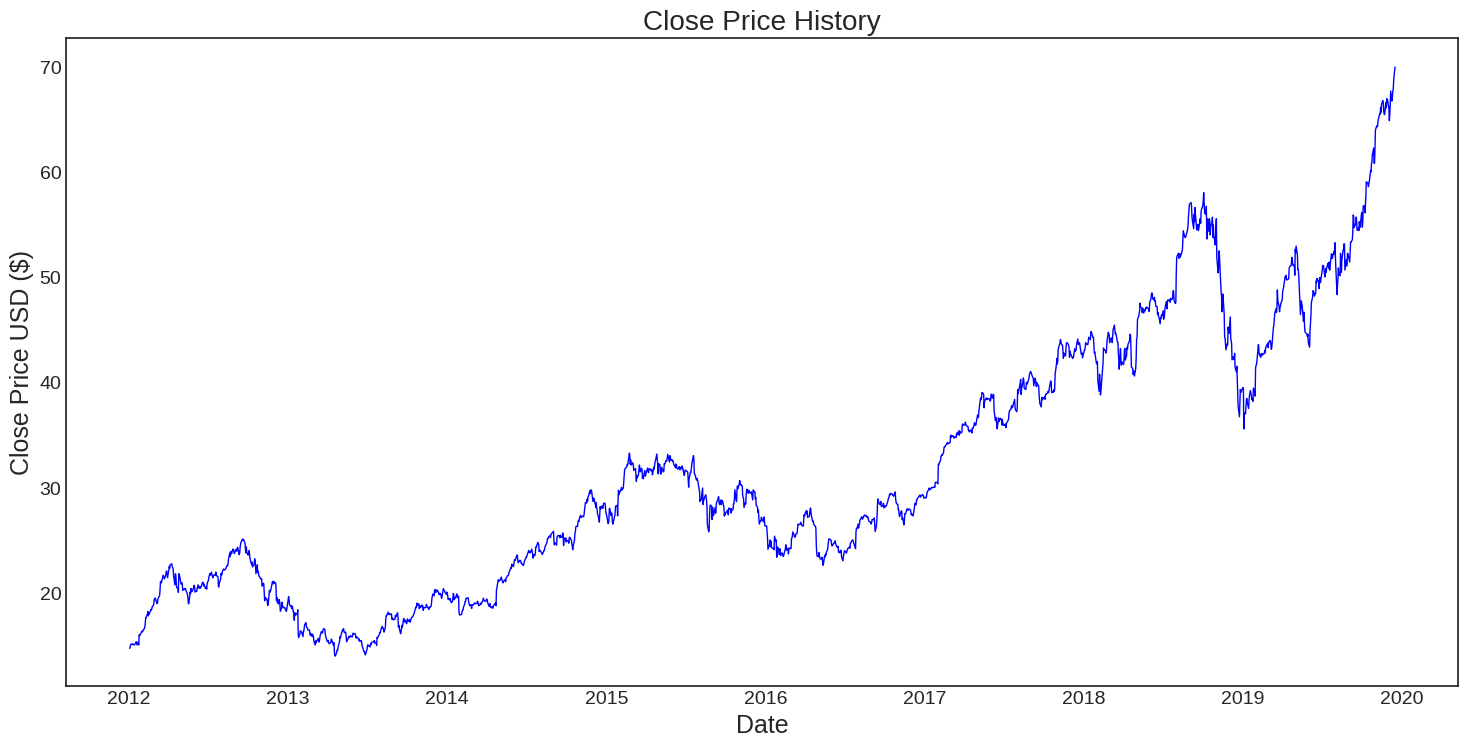

In [ ]:
#Visulaising the closing Price History
plt.style.use('seaborn-white')
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'], linewidth=1, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
#Checking for Null Values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#An overview of the central tendency, spread, and distribution of the numerical data in the DataFrame
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2.002000e+03
mean,31.500624,31.779222,31.219423,31.508181,29.127751,2.384896e+08
std,12.371571,12.480324,12.281628,12.392939,12.605787,1.875819e+08
min,13.856071,14.271429,13.753571,13.947500,11.997524,4.544800e+07
25%,21.439375,21.659821,21.228661,21.480357,18.381325,1.104136e+08
50%,28.193750,28.501249,27.911250,28.224999,25.755273,1.748130e+08
75%,40.946876,41.413124,40.448124,40.966875,38.668251,2.994964e+08
max,69.250000,70.197502,69.245003,69.964996,68.162163,1.506120e+09


In [ ]:
#Create a new dataframe with only the 'Close Column' that is extract from df dataset
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on math.ceil to round up
training_data_len = math.ceil(len(dataset)*.8)

#print(dataset)
print(f"The length of the Training dataset will be : {training_data_len}")


The length of the Training dataset will be : 1602


**To scale data in machine learning, you need to:**

1. Choose a scaling technique, such as normalization, standardization, or min-max scaling. These methods adjust the feature values while preserving their relative relationships and distributions.
2. Fit the scaler using available training data. This means the scaler will estimate the parameters needed to transform the data, such as the minimum, maximum, mean, and standard deviation.
3. Apply the scaler to the training data and any new data. This means the scaler will transform the data using the estimated parameters, resulting in scaled data that can be used for machine learning.

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1,1))

#print(scaled data)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

**Training Dataset**
1. Training data is the initial dataset used to train machine learning models.
2. It is a set of data samples that teach the models how to make predictions or perform a desired task.
3.  For supervised ML models, the training data is labeled, meaning it has the correct answers or outcomes for the models to learn.
4.  Training data is also known as training dataset, learning set, and training set.

In [ ]:
#Create the training data set
#Create the scaled training data
train_data = scaled_data[0:training_data_len,:]

#Split hte data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [ ]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)

(1542, 60)
(1542,)
[[0.0131974  0.01460639 0.01753278 ... 0.13799896 0.14278065 0.14478257]
 [0.01460639 0.01753278 0.0203189  ... 0.14278065 0.14478257 0.13983513]
 [0.01753278 0.0203189  0.01989174 ... 0.14478257 0.13983513 0.13326194]
 ...
 [0.49796939 0.52305089 0.52055161 ... 0.58133624 0.58718262 0.59914313]
 [0.52305089 0.52055161 0.5179632  ... 0.58718262 0.59914313 0.59267195]
 [0.52055161 0.5179632  0.51448215 ... 0.59914313 0.59267195 0.59070827]]
[0.13983513 0.13326194 0.14542651 ... 0.59267195 0.59070827 0.58307676]


## In the context of deep learning models, particularly Long Short-Term Memory (LSTM) networks, the input data is expected to be in a specific format, which is a 3D array. The three dimensions typically represent:

**Samples:** Each sequence in your dataset is considered a sample. For example, if we are working with time series data, each sample might be a sequence of values over time.

**Time Steps:** Each time step in a sample represents an observation or a timestamp in the sequence. For instance, if you are predicting the next value in a time series based on the previous values, each time step would be one data point in the sequence.

**Features:** Each feature at a time step represents the different variables or dimensions of your data at that particular point in time.

When working with LSTMs in frameworks like TensorFlow or PyTorch, the input shape is usually defined as (batch_size, time_steps, features). Reshaping the data into this format is necessary to ensure compatibility with the expectations of the LSTM layer.

In [ ]:
#Reshape the data as our data is in 2-dimensional But LSTM have 3-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1542, 60, 1)

#Model Training

**Structure of LSTM**

The basic difference between the architectures of RNNs and LSTMs is that the hidden layer of LSTM is a gated unit or gated cell. It consists of four layers that interact with one another in a way to produce the output of that cell along with the cell state. These two things are then passed onto the next hidden layer. Unlike RNNs which have got only a single neural net layer of tanh, LSTMs comprise three logistic sigmoid gates and one tanh layer. Gates have been introduced in order to limit the information that is passed through the cell. They determine which part of the information will be needed by the next cell and which part is to be discarded. The output is usually in the range of 0-1 where ‘0’ means ‘reject all’ and ‘1’ means ‘include all’.  
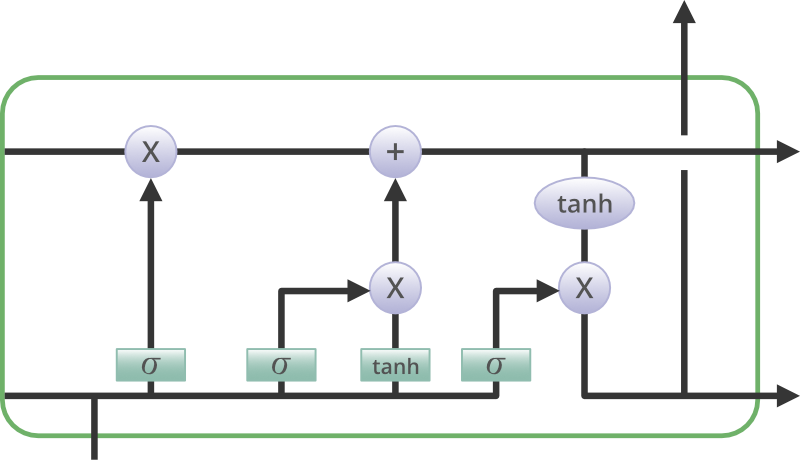



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#Build the LSTM Model

# Assuming you want to create a Sequential model
model = Sequential()

# Define the input shape
input_shape = (x_train.shape[1], 1)

# Add the LSTM layer with correct argument order
# Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=input_shape))

# Add dropout to prevent overfitting
model.add(Dropout(0.2))

#Add second layer to model
model.add(LSTM(50, return_sequences=False))

# Add dropout to prevent overfitting
model.add(Dropout(0.2))

#Add Dense Layer to model with 25 neurons
model.add(Dense(25))

#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 3190

## Train The Model

Alright, we can begin by making a training set and a testing set. We can now train our model and verify its accuracy using the testing set. The model has never seen the test data during training. Therefore, the accuracy result we will obtain will be valid. We can use different techniques to train a neural network model, but the easiest to understand and implement is backpropagation. Now, let’s say that we get a less-than-favorable performance from our training-testing approach. We can maybe change some hyperparameters from our model and try again.

In [ ]:
#Train the model
model.fit(
    x_train,
    y_train,
    epochs=25,
    batch_size = 32
)


Epoch 1/25
49/49 [==============================] - 8s 58ms/step - loss: 0.0093
Epoch 2/25
49/49 [==============================] - 3s 58ms/step - loss: 0.0011
Epoch 3/25
49/49 [==============================] - 4s 74ms/step - loss: 7.6254e-04
Epoch 4/25
49/49 [==============================] - 4s 80ms/step - loss: 7.8345e-04
Epoch 5/25
49/49 [==============================] - 3s 57ms/step - loss: 7.2971e-04
Epoch 6/25
49/49 [==============================] - 3s 58ms/step - loss: 6.6408e-04
Epoch 7/25
49/49 [==============================] - 3s 58ms/step - loss: 6.0418e-04
Epoch 8/25
49/49 [==============================] - 4s 86ms/step - loss: 6.3706e-04
Epoch 9/25
49/49 [==============================] - 3s 66ms/step - loss: 5.6015e-04
Epoch 10/25
49/49 [==============================] - 3s 57ms/step - loss: 4.9666e-04
Epoch 11/25
49/49 [==============================] - 3s 57ms/step - loss: 5.3620e-04
Epoch 12/25
49/49 [==============================] - 3s 64ms/step - loss: 4.8525e-

# Testing and Validating model



In [ ]:
#Create the testing data set
#Create a new array containing scales values from the index 1542 to 2002
test_data = scaled_data[training_data_len-60:, :]

#Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]


for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data to 3D
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)



13/13 [==============================] - 0s 25ms/step


 **The Mean Squared Error, Mean absolute error, Root Mean Squared Error, and R-Squared or Coefficient of determination metrics** are used to evaluate the performance of the model in regression analysis.

1. **MAE:** The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.


2. **MSE:** Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

3. **RMSE:** Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

4. **R-Squared:** The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Squared Error (MAE)
mae = mean_absolute_error(y_test, predicted_prices)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_prices)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R2 Square Value
r2 = r2_score(y_test, predicted_prices)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Square value: {r2}")

# Calculate percentage accuracy based on R-squared
percentage_accuracy = (r2 * 100)

print(f"Percentage Accuracy: {percentage_accuracy}%")

Mean Absolute Error (MAE): 1.0295734119415283
Mean Squared Error (MSE): 1.9604426367531778
Root Mean Squared Error (RMSE): 1.4001580756304546
R2 Square value: 0.95881617844473
Percentage Accuracy: 95.881617844473%


<ipython-input-74-0db6e4b48be5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_prices
<ipython-input-74-0db6e4b48be5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


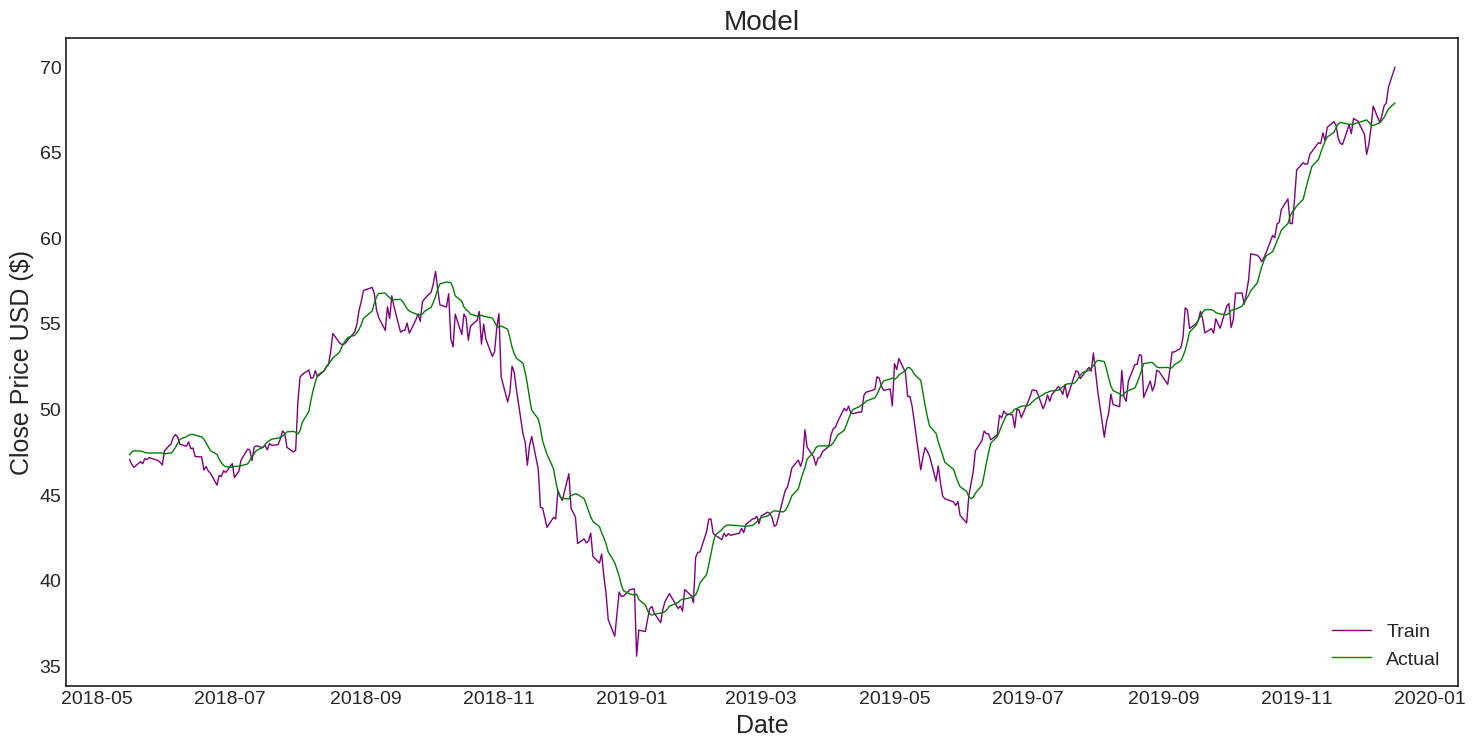

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predicted_prices

#Visualise the data
plt.style.use('seaborn-white')
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'], linewidth=1, color='blue')
plt.plot(valid['Close'], label='Close', color='purple', linewidth=1)
plt.plot(valid['Predictions'], label='Predictions', color='green', linewidth=1)
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

# Getting predicitions - For Tomorrow

In [ ]:
#Get the quote

# Define the ticker symbol and date range
ticker_symbol = "AAPL"
start_date = "2012-01-01"
end_date = "2019-12-17"

# Fetch the historical data
apple_quote = yf.download(ticker_symbol, start=start_date, end=end_date)

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be the values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predictes scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price = pred_price[0]

print(f'Predicted Closing Price of {ticker_symbol} tomorrow:{pred_price}')

# Fetch the historical data
df1 = yf.download(ticker_symbol, start=end_date, end="2019-12-18")
actual = df1['Close'].values
print(f'Actual Closing Price of {ticker_symbol} tomorrow: {actual}')

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 35ms/step
Predicted Closing Price of AAPL tomorrow:[68.34718]
[*********************100%%**********************]  1 of 1 completed
Actual Closing Price of AAPL tomorrow: [70.10250092]


## Demonstrate prediction for next 70 days

In [ ]:
#Create a new dataframe
# Fetch the historical data
df1 = yf.download(ticker_symbol, start="2019-12-17", end="2020-03-30")

#Get the last 60 day closing price values
prev = new_df[-60:]

#Get the curr day closing price values
curr = df1.filter(['Close'])

total = pd.concat([prev, curr])

data = total

#convert the dataset into numpy array
total = total.values

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(total.reshape(-1,1))


#Create a new array containing scales values
input = scaled_data[:, :]

# Create the dataset x_test and y_test
x_input = []
y_output = total[60:, :]

for i in range(60, len(input)):
    x_input.append(input[i-60:i, 0])

#Convert the data to a numpy array
x_input = np.array(x_input)

#Reshape the data to 3D
x_input = np.reshape(x_input,(x_input.shape[0], x_input.shape[1], 1))

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_input)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

[*********************100%%**********************]  1 of 1 completed
3/3 [==============================] - 0s 20ms/step


<ipython-input-80-c8f2885e1b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_prices
<ipython-input-80-c8f2885e1b0b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


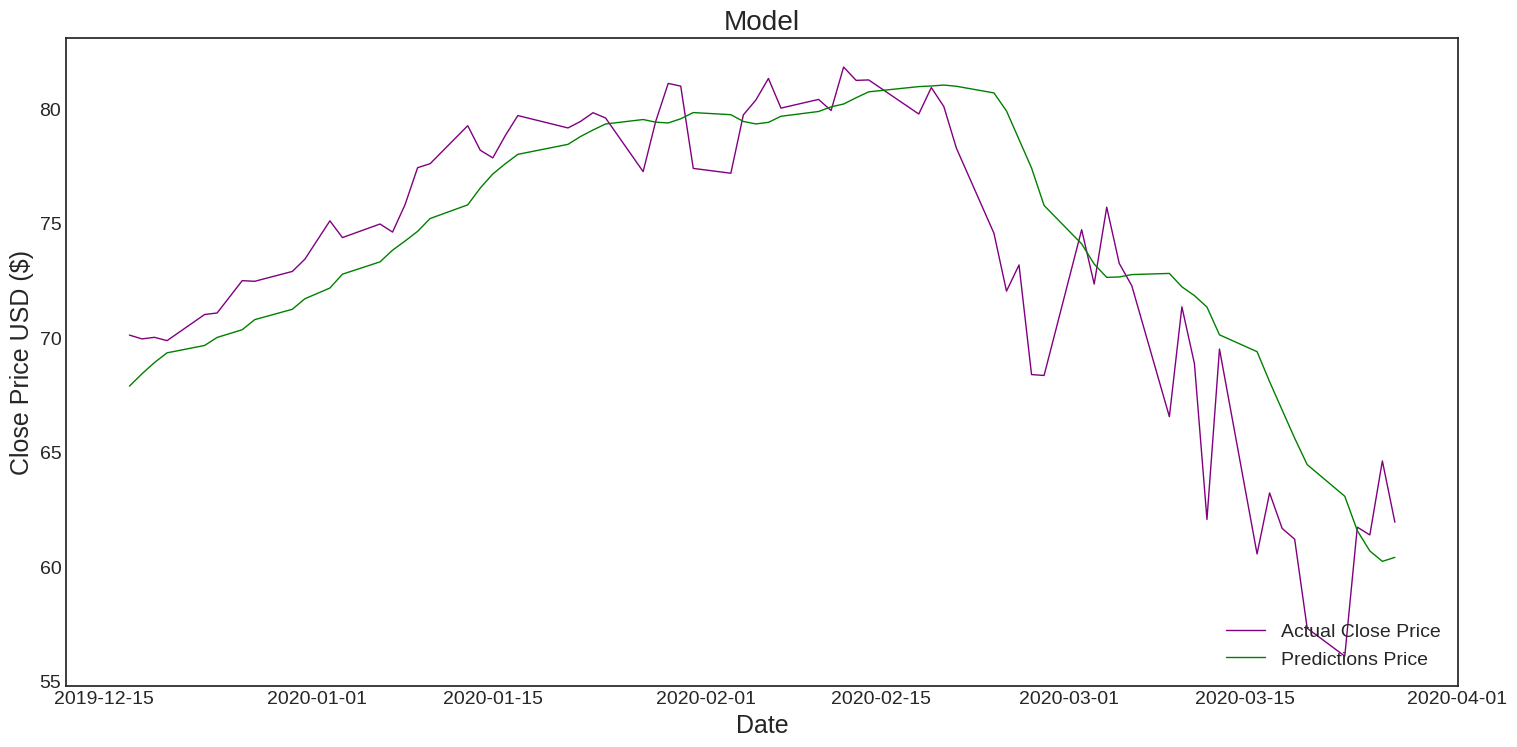

In [ ]:
#Plot the data
valid = data[60:]
valid['Predictions'] = predicted_prices

#Visualise the data
plt.style.use('seaborn-white')
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid['Close'], label='Actual Close Price', color='purple', linewidth=1)
plt.plot(valid['Predictions'], label='Prediction Price', color='green', linewidth=1)
plt.legend([ 'Actual Close Price', 'Predictions Price'], loc='lower right')

plt.show()